In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Univariate Time Series

In [2]:
df = pd.read_csv('IT UV LED  275nm Intensity-90_11V90mA_500um gap_Device voltgae10V_60pulses.csv',header=None)

In [3]:
df.columns = ['time','voltage']

In [4]:
df = df['voltage']

In [5]:
df.describe()

count    2.322100e+04
mean     1.556410e-12
std      4.795832e-13
min      8.387570e-13
25%      1.193170e-12
50%      1.456500e-12
75%      1.848100e-12
max      3.921270e-12
Name: voltage, dtype: float64

In [6]:
df

0        2.979520e-12
1        2.413630e-12
2        2.280830e-12
3        2.213000e-12
4        2.194880e-12
             ...     
23216    8.841750e-13
23217    8.996720e-13
23218    8.767840e-13
23219    8.445980e-13
23220    8.685590e-13
Name: voltage, Length: 23221, dtype: float64

In [6]:
df.shift(1)

0                 NaN
1        2.979520e-12
2        2.413630e-12
3        2.280830e-12
4        2.213000e-12
             ...     
23216    8.946660e-13
23217    8.841750e-13
23218    8.996720e-13
23219    8.767840e-13
23220    8.445980e-13
Name: voltage, Length: 23221, dtype: float64

In [7]:
shifts = pd.DataFrame(
    {
        'present': df,
        'past': df.shift(1)
    }
)

In [8]:
shifts

,present,past
0,2.979520e-12,NaN
1,2.413630e-12,2.979520e-12
2,2.280830e-12,2.413630e-12
3,2.213000e-12,2.280830e-12
4,2.194880e-12,2.213000e-12
...,...,...
23216,8.841750e-13,8.946660e-13
23217,8.996720e-13,8.841750e-13
23218,8.767840e-13,8.996720e-13
23219,8.445980e-13,8.767840e-13


In [9]:
shifts = shifts.dropna()

In [10]:
shifts.corr()

,present,past
present,1.000000,0.974653
past,0.974653,1.000000


<AxesSubplot:>

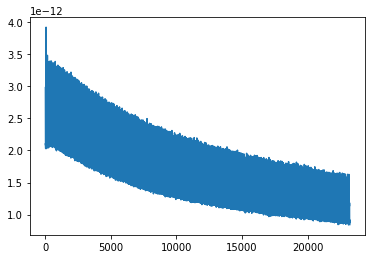

In [12]:
df.shift(1).plot()

In [13]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.dropna())
print(result)

pvalue = result[1]
if pvalue < 0.05:
    print('stationary')
else:
    print('not stationary')

(-13.276509982367484, 7.845952005375735e-25, 47, 23173, {'1%': -3.430632226061599, '5%': -2.861664734940975, '10%': -2.566836392837296}, -1318503.9025781269)
stationary


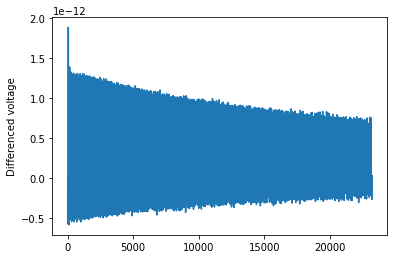

In [16]:
differenced_data = df.diff().dropna()

# Plot the differenced data
ax = differenced_data.plot()
ax.set_ylabel('Differenced voltage')
plt.show()

In [17]:
differenced_data

1       -5.658900e-13
2       -1.328000e-13
3       -6.783000e-14
4       -1.812000e-14
5       -4.685000e-14
             ...     
23216   -1.049100e-14
23217    1.549700e-14
23218   -2.288800e-14
23219   -3.218600e-14
23220    2.396100e-14
Name: voltage, Length: 23220, dtype: float64

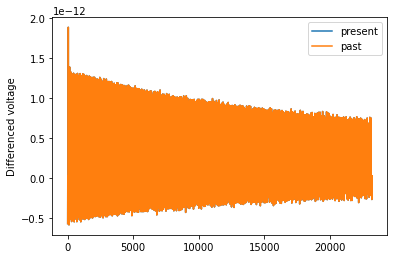

,present,past
present,1.00000,-0.08003
past,-0.08003,1.00000


In [15]:
shifts_diff = pd.DataFrame(
    {
        'present': differenced_data,
        'past': differenced_data.shift(1)
    }
)

ax = shifts_diff.plot()
ax.set_ylabel('Differenced voltage')
plt.show()

shifts_diff.corr()

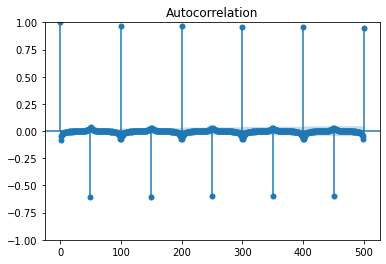

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(differenced_data, lags=500)
plt.show()

/home/alchemist/anaconda3/envs/sclone/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


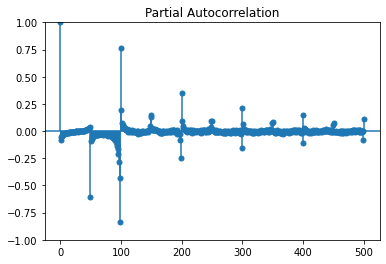

In [46]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(differenced_data, lags = 500)
plt.show()

# AR

In [ ]:
x6 = c1x1+c2x2+x3+x4+x5+e

In [31]:
from statsmodels.regression.linear_model import yule_walker
coefficients, sigma = yule_walker(differenced_data, order = 50)
print('coefficients: ', -coefficients)
print('sigma: ', sigma)

coefficients:  [0.07209939 0.04975948 0.04046447 0.03661279 0.02962227 0.02513086
 0.02406975 0.02144079 0.01944008 0.01772145 0.01661138 0.01421966
 0.01530591 0.01396965 0.01131751 0.0119117  0.01082335 0.0106327
 0.0093052  0.00820852 0.01106351 0.0066517  0.00736175 0.00622204
 0.00995644 0.00518415 0.00578183 0.00516281 0.00774675 0.00369467
 0.00518545 0.00329585 0.00436207 0.00407888 0.00345134 0.0025632
 0.00497637 0.00188843 0.0035477  0.00383531 0.00333255 0.00389002
 0.00306611 0.00324262 0.0035532  0.00600828 0.00658017 0.01017963
 0.01749838 0.60534611]
sigma:  8.500329318577105e-14


In [14]:
differenced_data

NameError: name 'differenced_data' is not defined

Test R2: 0.9674762503981225


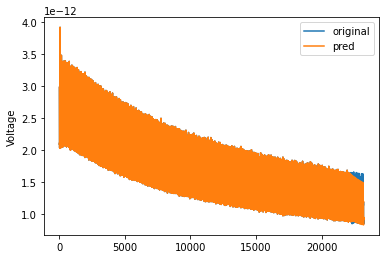

In [45]:
from sklearn.metrics import r2_score

train = list(differenced_data)[:-1000]
test = list(df)[-1000:]

coefficients, sigma = yule_walker(train, order = 100)

val_list = train

val_list.reverse()

n_steps = 1000


for i in range(n_steps):
    
    new_val = 0
    for j in range(len(coefficients)):
        
        new_val += coefficients[j] * val_list[j] #c1*x1+c2*x2...c100*x100
    
    val_list.insert(0, new_val)

val_list.reverse()

val_list = [df[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()

validation = pd.DataFrame({
    'original': df.reset_index(drop=True),
    'pred': new_val_list })

print('Test R2:', r2_score(validation.iloc[-1000:, 0], validation.iloc[-1000:, 1]))


plt.plot(range(0, 23221), validation)
plt.legend(validation.columns)
plt.ylabel('Voltage')
plt.show()

In [ ]:
# AR, MA, ARMA, ARIMA, SARIMA, SARIMAX

In [19]:
a = pd.Series([4,5,6,7]).diff()

In [22]:
a

0    NaN
1    1.0
2    1.0
3    1.0
dtype: float64

In [24]:
a[0] = 4

In [26]:
a.cumsum()

0    4.0
1    5.0
2    6.0
3    7.0
dtype: float64

In [23]:
a.fillna(4)

AttributeError: 'numpy.float64' object has no attribute 'fillna'

# MA

In [29]:
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
train = differenced_data[0:-1000]
test = differenced_data[-1000:]

# Forecast the first MA(10) model
mod = ARIMA(train, order=(0,0,10))
res = mod.fit()

orig_data = differenced_data
pred = res.predict()
fcst = res.forecast(steps = len(test))

print(r2_score(train, pred))
print(r2_score(test, fcst))

c:\Users\VIVIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\VIVIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\VIVIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\VIVIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-1896909136635668.0
-1526162627562983.8


c:\Users\VIVIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# ARMA

/home/alchemist/anaconda3/envs/sclone/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.9498427092639081


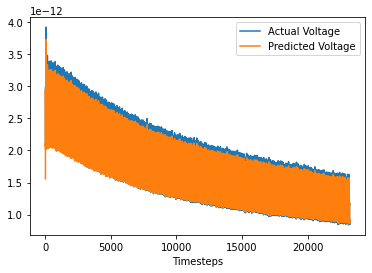

In [64]:
mod = ARIMA(list(df), order=(1,0,1))
res = mod.fit()
pred = res.predict()
print(r2_score(list(df), pred))

plt.plot(list(df))
plt.plot(pred)
plt.legend(['Actual Voltage', 'Predicted Voltage'])
plt.xlabel('Timesteps')
plt.show()

In [65]:
res.summary()

/home/alchemist/anaconda3/envs/sclone/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:2968: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                23221
Model:                 ARIMA(1, 0, 1)   Log Likelihood              246001.468
Date:                Fri, 09 Sep 2022   AIC                        -491994.935
Time:                        14:10:38   BIC                        -491962.724
Sample:                             0   HQIC                       -491984.473
                              - 23221                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.556e-12         -0       -inf      0.000    1.56e-12    1.56e-12
ar.L1          0.9783   2.52e-23   3.88e+22      0.000       0.978       0.978
ma.L1         -0.0734   1.09e-24  -6.75e+22      0.000      -0.073      -0.073
sigma2          1e-10    1.3e-11      7.689      0.000    7.45e-11    1.25e-10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           6987676.12
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             7.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        86.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

# ARIMA

c:\Users\VIVIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\VIVIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\VIVIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\VIVIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood o

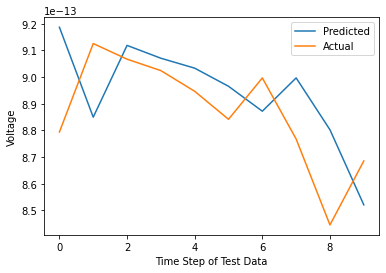

In [31]:
import numpy as np
data = df.values
X_train, X_test = data[:-10], data[-10:]
X_test_orig = X_test.copy()

forecast = []
for step in range(10):

    mod = ARIMA(X_train, order=(1,1,1))
    res = mod.fit()
    forecast.append(res.forecast(steps=1))
    X_train = np.concatenate((X_train, X_test[0:1]))
    X_test = X_test[1:]
    
plt.plot(forecast)
plt.plot(X_test_orig)
plt.legend(['Predicted', 'Actual'])
plt.ylabel('Voltage')
plt.xlabel('Time Step of Test Data')
plt.show()